# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [70]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [102]:
iris = load_iris()

In [103]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [104]:
X, y = load_iris(return_X_y=True)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [106]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [107]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 1.0


In [108]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [109]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9583333333333334
평가 데이터 점수: 0.9333333333333333


In [11]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [12]:
cross_validate (
  estimator=estimator,
  X=X, y=y,
  cv=5,
  n_jobs=multiprocessing.cpu_count(),
  verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.5s finished


{'fit_time': array([0.00435305, 0.00221729, 0.00795722, 0.00288177, 0.00138736]),
 'score_time': array([0.00272012, 0.00264096, 0.00235176, 0.00312543, 0.00242209]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

In [13]:
param_grid = [{'n_neighbors': [3, 5, 7],
               'weights':['uniform', 'distance'],
               'algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [14]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [15]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [16]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [17]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [18]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [19]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [20]:
iris_comp_df = pd.DataFrame(data= X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-18.515331,-7.935452,0
1,-20.792215,-8.554692,0
2,-21.255947,-8.076281,0
3,-21.495474,-7.780927,0
4,-18.415924,-8.317799,0
...,...,...,...
145,16.815815,1.987743,2
146,13.640759,1.900589,2
147,15.860025,2.037676,2
148,16.600529,0.127390,2


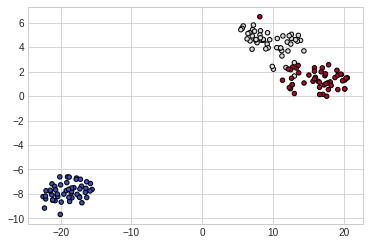

In [21]:
plt.scatter(X_comp[:,0], X_comp[:,1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [22]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict= model.predict(X_comp)

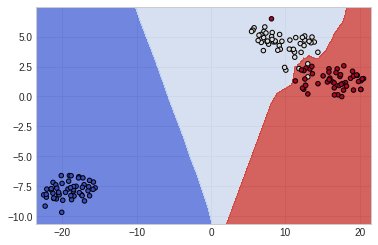

In [23]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 유방암 데이터

In [24]:
cancer = load_breast_cancer()

In [25]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [26]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,20.200,26.83,133.70,1234.0,0.09905,0.16690,0.16410,0.126500,0.1875,0.06020,0.9761,1.8920,7.128,103.60,0.008439,0.046740,0.059040,0.025360,0.03710,0.004286,24.19,33.81,160.00,1671.0,0.1278,0.34160,0.37030,0.21520,0.3271,0.07632,0
1,17.990,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.088240,0.1992,0.06069,0.4537,0.8733,3.061,49.81,0.007231,0.027720,0.025090,0.014800,0.01414,0.003336,21.08,25.41,138.10,1349.0,0.1482,0.37350,0.33010,0.19740,0.3060,0.08503,0
2,11.990,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.042740,0.1820,0.06850,0.2623,1.2040,1.865,19.39,0.008320,0.020250,0.023340,0.016650,0.02094,0.003674,12.98,30.36,84.48,513.9,0.1311,0.18220,0.16090,0.12020,0.2599,0.08251,1
3,19.180,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.067720,0.1767,0.05529,0.4357,1.0730,3.833,54.22,0.005524,0.036980,0.027060,0.012210,0.01415,0.003397,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.38650,0.17080,0.3193,0.09221,0
4,11.680,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.031320,0.1853,0.06401,0.3713,1.1540,2.554,27.57,0.008998,0.012920,0.018510,0.011670,0.02152,0.003213,13.32,21.59,86.57,549.8,0.1526,0.14770,0.14900,0.09815,0.2804,0.08024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0.000000,0.1903,0.06422,0.1988,0.4960,1.218,12.26,0.006040,0.005656,0.000000,0.000000,0.02277,0.003220,10.62,14.10,66.53,342.9,0.1234,0.07204,0.00000,0.00000,0.3105,0.08151,1
451,12.160,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.015270,0.1464,0.06284,0.2194,1.1900,1.678,16.26,0.004911,0.016660,0.013970,0.005161,0.01454,0.001858,13.34,27.87,88.83,547.4,0.1208,0.22790,0.16200,0.05690,0.2406,0.07729,1
452,13.780,15.79,88.37,585.9,0.08817,0.06718,0.01055,0.009937,0.1405,0.05848,0.3563,0.4833,2.235,29.34,0.006432,0.011560,0.007741,0.005657,0.01227,0.002564,15.27,17.50,97.90,706.6,0.1072,0.10710,0.03517,0.03312,0.1859,0.06810,1
453,15.060,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.088150,0.1855,0.06284,0.4768,0.9644,3.706,47.14,0.009250,0.037150,0.048670,0.018510,0.01498,0.003520,18.23,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234,0


In [28]:
cancer_test_df = pd.DataFrame(data=X_test, columns=cancer.feature_names)
cancer_test_df['target'] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.500,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,0.1365,0.05335,0.2244,0.6864,1.509,20.39,0.003338,0.003746,0.00203,0.003242,0.01480,0.001566,14.970,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192,1
1,14.420,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.058390,0.1879,0.06390,0.2895,1.8510,2.376,26.85,0.008005,0.028950,0.03321,0.014240,0.01462,0.004452,16.330,30.86,109.50,826.4,0.14310,0.30260,0.31940,0.15650,0.2718,0.09353,0
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.159400,0.087440,0.1943,0.06132,0.8191,1.9310,4.493,103.90,0.008074,0.040880,0.05321,0.018340,0.02383,0.004515,22.660,30.93,145.30,1603.0,0.13900,0.34630,0.39120,0.17080,0.3007,0.08314,0
3,11.750,20.18,76.10,419.8,0.10890,0.11410,0.068430,0.037380,0.1993,0.06453,0.5018,1.6930,3.926,38.34,0.009433,0.024050,0.04167,0.011520,0.03397,0.005061,13.320,26.21,88.91,543.9,0.13580,0.18920,0.19560,0.07909,0.3168,0.07987,1
4,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.097990,0.077850,0.1618,0.05557,0.5781,0.9168,4.218,72.44,0.006208,0.019060,0.02375,0.014610,0.01445,0.001906,24.310,26.37,161.20,1780.0,0.13270,0.23760,0.27020,0.17650,0.2609,0.06735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,0.1949,0.07292,0.7036,1.2680,5.373,60.78,0.009407,0.070560,0.06899,0.018480,0.01700,0.006113,17.670,29.51,119.10,959.5,0.16400,0.62470,0.69220,0.17850,0.2844,0.11320,0
110,10.260,14.71,66.20,321.6,0.09882,0.09159,0.035810,0.020370,0.1633,0.07005,0.3380,2.5090,2.394,19.33,0.017360,0.046710,0.02611,0.012960,0.03675,0.006758,10.880,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488,1
111,8.878,15.49,56.74,241.0,0.08293,0.07698,0.047210,0.023810,0.1930,0.06621,0.5381,1.2000,4.277,30.18,0.010930,0.028990,0.03214,0.015060,0.02837,0.004174,9.981,17.70,65.27,302.0,0.10150,0.12480,0.09441,0.04762,0.2434,0.07431,1
112,13.870,20.70,89.77,584.8,0.09578,0.10180,0.036880,0.023690,0.1620,0.06688,0.2720,1.0470,2.076,23.12,0.006298,0.021720,0.02615,0.009061,0.01490,0.003599,15.050,24.75,99.17,688.6,0.12640,0.20370,0.13770,0.06845,0.2249,0.08492,1


In [29]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [30]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9604395604395605
평가 데이터 점수: 0.9035087719298246


In [32]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [85]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9788732394366197
평가 데이터 점수: 1.0


In [34]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [35]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00268674, 0.00235677, 0.00150204, 0.00164914, 0.00185108]),
 'score_time': array([0.01341891, 0.00944853, 0.01407957, 0.01501536, 0.00694823]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [36]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [37]:
param_grid = [{'model__n_neighbors':[3,6,7],
               'model__weights':['uniform','distance'],
               'model__algorithm':['ball_tree', 'kd_tree','brute']}]

In [38]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [39]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 6, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [40]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [41]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [42]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [43]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,1.678214,30.824703,0
1,4.152541,31.983292,0
2,7.152766,28.075174,0
3,-16.699728,-18.787680,0
4,6.383981,25.848625,0
...,...,...,...
564,4.055204,33.709389,0
565,6.040696,28.451075,0
566,16.949877,11.718603,0
567,4.891862,29.912952,0


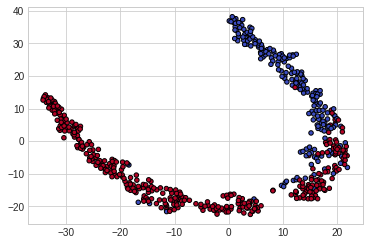

In [44]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [45]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

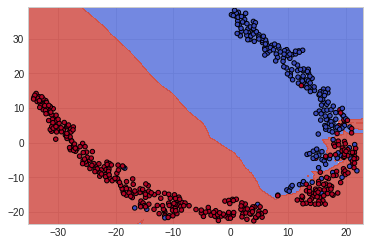

In [46]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 와인

In [73]:
wine = load_wine()

In [74]:
wine_df = pd.DataFrame(data=wind.data, columns=wind.feature_names)
wine_df['target'] = wind.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [76]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
wine_train_df = pd.DataFrame(data=X_train, columns=wine.feature_names)
wine_train_df['target'] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
1,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0,2
2,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,0
3,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
4,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0,2
138,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0,0
139,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0
140,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1


In [78]:
wine_test_df = pd.DataFrame(data=X_test, columns=wine.feature_names)
wine_test_df['target'] = y_test
wine_test_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0,1
1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
2,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2
3,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,2
4,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0,0
5,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1
6,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1
7,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0,2
8,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1
9,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0,0


In [79]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [80]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.8028169014084507
평가 데이터 점수: 0.7222222222222222


In [82]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [84]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9788732394366197
평가 데이터 점수: 1.0


In [86]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [87]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.4s finished


{'fit_time': array([0.01755476, 0.01015067, 0.00162983, 0.00951791, 0.0018146 ]),
 'score_time': array([0.01110721, 0.01283026, 0.01058412, 0.00587416, 0.01353288]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [88]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [89]:
param_grid = [{'model__n_neighbors':[3,6,7],
               'model__weights':['uniform','distance'],
               'model__algorithm':['ball_tree', 'kd_tree','brute']}]

In [90]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [91]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 6, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [92]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [93]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9665079365079364


In [94]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [95]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,8.612456,-6.141982,0
1,8.372118,-5.885898,0
2,10.641024,-7.042710,0
3,13.096102,-8.467059,0
4,1.500561,-1.056445,0
...,...,...,...
173,1.705266,-0.713601,2
174,2.036319,-0.998673,2
175,4.170382,-2.561074,2
176,4.362305,-2.580693,2


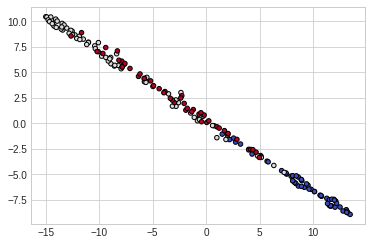

In [96]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [97]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

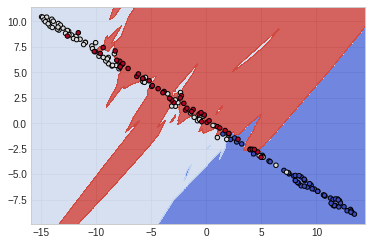

In [98]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [99]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [100]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [110]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
boston_train_df = pd.DataFrame(data=X_train, columns = boston.feature_names)
boston_train_df['TARGET'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,12.80230,0.0,18.10,0.0,0.7400,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79,10.8
1,6.96215,0.0,18.10,0.0,0.7000,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11,15.1
2,1.35472,0.0,8.14,0.0,0.5380,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.5
3,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5
4,0.65665,20.0,3.97,0.0,0.6470,6.842,100.0,2.0107,5.0,264.0,13.0,391.93,6.90,30.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
400,0.05023,35.0,6.06,0.0,0.4379,5.706,28.4,6.6407,1.0,304.0,16.9,394.02,12.43,17.1
401,0.09068,45.0,3.44,0.0,0.4370,6.951,21.5,6.4798,5.0,398.0,15.2,377.68,5.10,37.0
402,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6


In [112]:
boston_test_df = pd.DataFrame(data=X_test, columns = boston.feature_names)
boston_test_df['TARGET'] = y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86,23.3
1,14.33370,0.0,18.10,0.0,0.614,6.229,88.0,1.9512,24.0,666.0,20.2,383.32,13.11,21.4
2,6.65492,0.0,18.10,0.0,0.713,6.317,83.0,2.7344,24.0,666.0,20.2,396.90,13.99,19.5
3,0.03551,25.0,4.86,0.0,0.426,6.167,46.7,5.4007,4.0,281.0,19.0,390.64,7.51,22.9
4,0.20608,22.0,5.86,0.0,0.431,5.593,76.5,7.9549,7.0,330.0,19.1,372.49,12.50,17.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
98,0.08387,0.0,12.83,0.0,0.437,5.874,36.6,4.5026,5.0,398.0,18.7,396.06,9.10,20.3
99,0.05735,0.0,4.49,0.0,0.449,6.630,56.1,4.4377,3.0,247.0,18.5,392.30,6.53,26.6
100,0.13642,0.0,10.59,0.0,0.489,5.891,22.3,3.9454,4.0,277.0,18.6,396.90,10.87,22.6


In [118]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [119]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [120]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7047098823248459
평가 데이터 점수: 0.536170754772495


In [121]:
model = KNeighborsRegressor()
model.fit(X_train_scale,y_train)

KNeighborsRegressor()

In [125]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.8437959322067369
평가 데이터 점수: 0.6418185038429216


In [126]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [127]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.7s finished


{'fit_time': array([0.00242448, 0.00154042, 0.00188613, 0.00192094, 0.00181651]),
 'score_time': array([0.00274706, 0.00188398, 0.00206423, 0.00207996, 0.00182319]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [128]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())]
)

In [129]:
param_grid = [{'model__n_neighbors':[3,6,7],
               'model__weights':['uniform','distance'],
               'model__algorithm':['ball_tree', 'kd_tree','brute']}]

In [130]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [132]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 6, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [133]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [134]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.4973060611762845


In [138]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [139]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,-6.029399,24.0
1,21.394842,21.6
2,17.811226,34.7
3,18.700632,33.4
4,18.963438,36.2
...,...,...
501,4.043546,22.4
502,4.715756,20.6
503,5.537203,23.9
504,5.495787,22.0


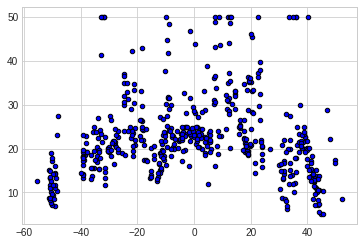

In [140]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [141]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

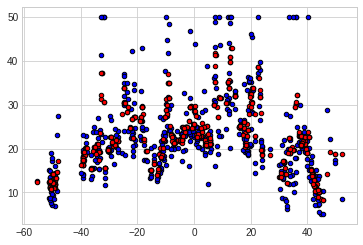

In [142]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 캘리포니아 주택 가격 데이터

In [143]:
california = fetch_california_housing()

In [144]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [145]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [146]:
california_train_df = pd.DataFrame(data=X_train, columns = california.feature_names)
california_train_df['TARGET'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,5.5261,10.0,7.037225,1.028765,2089.0,3.534687,35.42,-119.08,1.320
1,1.4812,39.0,5.424837,1.140523,1061.0,3.467320,36.39,-119.23,0.535
2,3.2574,32.0,3.718504,0.958661,1321.0,2.600394,37.38,-122.02,2.544
3,3.3516,33.0,6.913462,1.139423,569.0,2.735577,37.64,-121.05,1.500
4,4.1779,10.0,5.817851,1.054645,2088.0,3.803279,34.03,-117.64,1.591
...,...,...,...,...,...,...,...,...,...
16507,3.1875,30.0,4.171488,1.138430,2481.0,5.126033,34.06,-118.04,1.542
16508,4.0717,3.0,7.248285,1.262003,2703.0,3.707819,33.80,-117.22,1.265
16509,3.4559,16.0,5.684932,1.054795,956.0,4.365297,37.34,-120.50,1.080
16510,4.3594,23.0,5.225573,1.033776,2461.0,2.968637,37.56,-122.02,2.234


In [147]:
california_test_df = pd.DataFrame(data=X_test, columns = california.feature_names)
california_test_df['TARGET'] = y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,3.1543,29.0,4.933950,1.067371,1873.0,2.474240,36.61,-121.92,2.538
1,4.0806,19.0,5.942308,1.061538,1621.0,3.117308,32.90,-116.90,1.892
2,2.9688,52.0,4.230548,1.046110,870.0,2.507205,37.77,-122.28,2.208
3,1.7188,45.0,5.008065,1.040323,257.0,2.072581,37.77,-120.86,1.094
4,1.2446,27.0,4.147727,1.185606,1768.0,3.348485,34.02,-118.30,1.038
...,...,...,...,...,...,...,...,...,...
4123,1.8967,52.0,5.000000,1.049180,406.0,3.327869,36.74,-119.82,0.438
4124,4.0185,22.0,4.910979,1.020772,1807.0,2.681009,33.83,-117.97,2.009
4125,5.1695,2.0,7.299229,1.306131,7305.0,2.965895,33.89,-117.52,2.208
4126,1.7333,19.0,5.425197,1.125984,355.0,2.795276,40.45,-120.36,0.700


In [148]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [149]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [150]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.4531436961763816
평가 데이터 점수: 0.15477002614201985


In [151]:
model = KNeighborsRegressor()
model.fit(X_train_scale,y_train)

KNeighborsRegressor()

In [152]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.7938939376291425
평가 데이터 점수: 0.680116612126583


In [153]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [154]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.8s finished


{'fit_time': array([0.03192639, 0.03138328, 0.02876759, 0.02970958, 0.02897692]),
 'score_time': array([0.4217875 , 0.34298086, 0.36772203, 0.43820977, 0.30303812]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [155]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())]
)

In [156]:
param_grid = [{'model__n_neighbors':[3,6,7],
               'model__weights':['uniform','distance'],
               'model__algorithm':['ball_tree', 'kd_tree','brute']}]

In [157]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [158]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 6, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [159]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [160]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.5376515274379832


In [161]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [162]:
california_comp_df = pd.DataFrame(data=X_comp)
california_comp_df['target'] = y
california_comp_df

,0,target
0,71.314873,4.526
1,-89.413277,3.585
2,-35.438820,3.521
3,-30.578835,3.413
4,-29.918795,3.422
...,...,...
20635,1.208581,0.781
20636,69.476784,0.771
20637,-19.600294,0.923
20638,34.413517,0.847


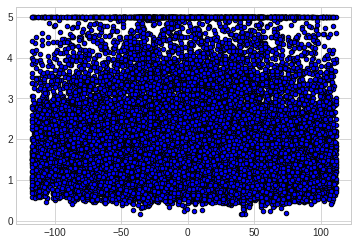

In [163]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [164]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

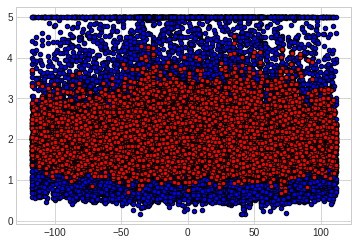

In [165]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');